# Business Understanding

## Introduction

The telecom company has provided access to three different datasets for a classification project. The first dataset consists of 3000 records and is stored in a remote database hosted on Microsoft SQL Server. The second dataset contains 2000 records and is stored on OneDrive. The third dataset is hosted on a GitHub repository.

## Objectives of the project

To assist the telecom company understand their data: The project aims to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, the project aims to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The project involves developing a predictive model to determine whether a customer is likely to churn or not. By using machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., the project aims to build a model that accurately predicts customer churn.

## Methodology

To achieve these objectives, the project will follow the CRISP-DM framework and involve the following steps:

Data exploration: Explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide an initial understanding of the data and help identify any data quality issues.

Missing value computations: Identify missing values in the datasets and decide on an appropriate strategy for handling them, such as imputation or removal of missing data points.

Feature engineering: Perform feature engineering to transform and create new variables that can potentially improve the predictive power of the models. This step may involve encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: Utilize machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. Train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: Evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: Fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

## Hypothesis
H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Understanding

## Load Datasets

### Load first dataset from database

In [733]:
# Import necessary libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
# Prediction
from sklearn.metrics import confusion_matrix

In [734]:
# Establish a connection
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)


### Load first dataset (database file)

In [735]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)


In [736]:
# Close connection
conn.close()


### Load second dataset (test file)

In [737]:
# Read the excel file into a pandas dataframe
df_test = pd.read_excel('Telco-churn-second-2000.xlsx')


### Load third dataset (csv file)

In [738]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Data Exploration

## Preprocessing

In [739]:
# View the datasets (df_db)
df_db

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [740]:
# View the datasets (df_csv)
df_csv

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [741]:
# View the datasets (df_test)
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [742]:
# Check data types of each column
print("Data Types:")

print("df_db Data Types:")
print(df_db.dtypes)

print("df_csv Data Types:")
print(df_csv.dtypes)

print("df_test Data Types:")
print(df_test.dtypes)
print()

Data Types:
df_db Data Types:
customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
df_csv Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport  

In [743]:
# Check uniqueness of non-numeric columns in df_db
 
# List of columns to get unique values from
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

# Iterate over the columns and print unique values
print("df_db")
for column in non_numeric_columns:
    unique_values = df_db[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()
    
print("df_csv")
for column in non_numeric_columns:
    unique_values = df_csv[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

print("df_test")
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']
# Iterate over the columns and print unique values
for column in non_numeric_columns:
    unique_values = df_test[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

df_db
Unique values in column gender:
['Female' 'Male']

Unique values in column SeniorCitizen:
[False  True]

Unique values in column Partner:
[ True False]

Unique values in column Dependents:
[False  True]

Unique values in column PhoneService:
[False  True]

Unique values in column MultipleLines:
[None False True]

Unique values in column InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in column OnlineSecurity:
[False True None]

Unique values in column OnlineBackup:
[True False None]

Unique values in column DeviceProtection:
[False True None]

Unique values in column TechSupport:
[False True None]

Unique values in column StreamingTV:
[False True None]

Unique values in column StreamingMovies:
[False True None]

Unique values in column Contract:
['Month-to-month' 'One year' 'Two year']

Unique values in column PaperlessBilling:
[ True False]

Unique values in column PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'

In [744]:
# Convert TotalCharges column in df_test to float64
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_test Data Types:")
print(df_test.dtypes)

# Convert TotalCharges column in df_csv to float64
df_csv['TotalCharges'] = pd.to_numeric(df_csv['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_csv Data Types:")
print(df_csv.dtypes)

df_test Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object
df_csv Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          ob

### Handling Missing Values

In [745]:
# Analyze missing values in df_db
missing_values_db = df_db.isnull().sum()
missing_percentage_db = (missing_values_db / len(df_db)) * 100

# Analyze missing values in df_csv
missing_values_csv = df_csv.isnull().sum()
missing_percentage_csv = (missing_values_csv / len(df_csv)) * 100

# Analyze missing values in df_test
missing_values_test = df_test.isnull().sum()
missing_percentage_test = (missing_values_test / len(df_test)) * 100

# Print the missing values information
print("Missing Values in df_db:")
print(missing_values_db)
print("Missing Percentage in df_db:")
print(missing_percentage_db)
print()

print("Missing Values in df_csv:")
print(missing_values_csv)
print("Missing Percentage in df_csv:")
print(missing_percentage_csv)
print()

print("Missing Values in df_test:")
print(missing_values_test)
print("Missing Percentage in df_test:")
print(missing_percentage_test)
print()

Missing Values in df_db:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64
Missing Percentage in df_db:
customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
Streaming

df_db


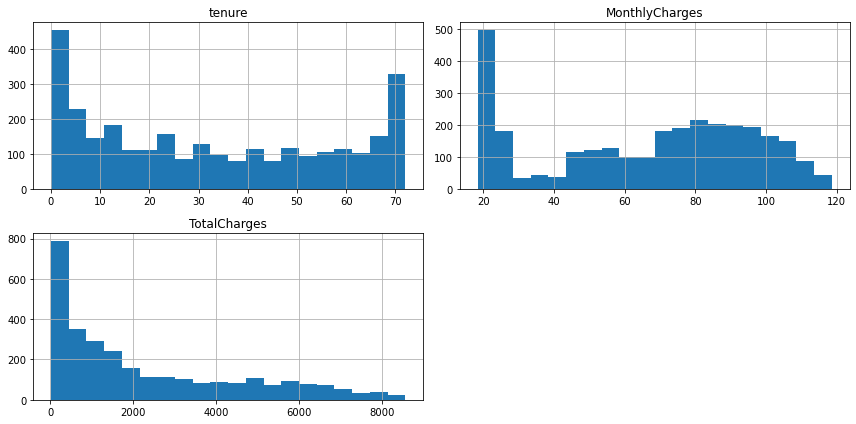

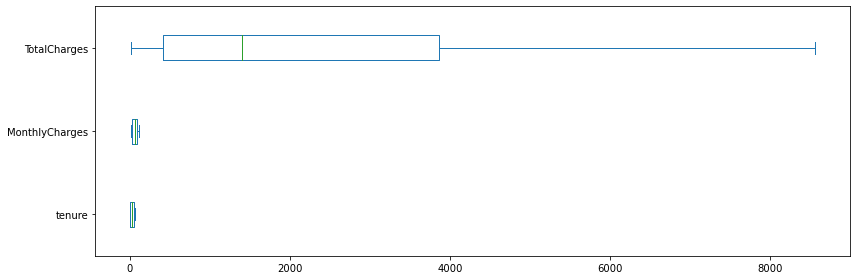

df_test


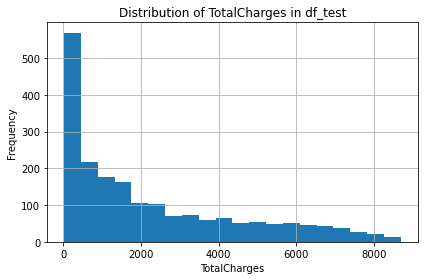

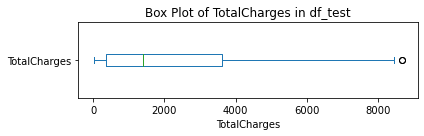

df_csv


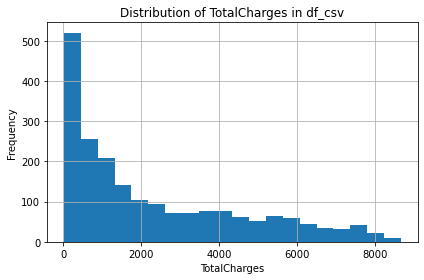

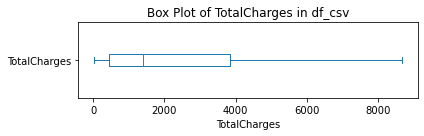

In [746]:
# Examine the distribution of columns with missing values and # assess the presence of outliers

# Assess the data distribution and outliers for numerical columns

# Histograms for numerical columns in df_db
print("df_db")
df_db_numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_db[df_db_numerical_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Box plots for numerical columns in df_db
df_db[df_db_numerical_cols].plot(kind='box', vert=False, figsize=(12, 4))
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_test
print("df_test")
df_test['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_test')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_test
df_test['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_test')
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_csv
print("df_csv")
df_csv['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_csv
df_csv['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

df_db
Value Counts for MultipleLines:
False    1437
True     1294
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
False    1478
True      871
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
False    1320
True     1029
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
False    1296
True     1053
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
False    1476
True      873
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
False    1190
True     1159
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
True     1199
False    1150
Name: StreamingMovies, dtype: int64



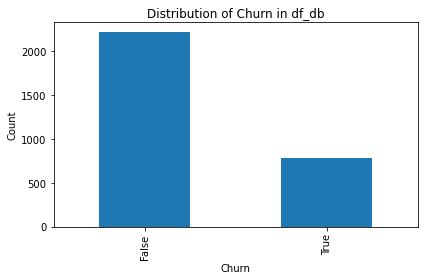

df_csv
Value Counts for MultipleLines:
No                  987
Yes                 836
No phone service    220
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
No                     1029
Yes                     585
No internet service     429
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
No                     911
Yes                    703
No internet service    429
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
No                     923
Yes                    691
No internet service    429
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
No                     996
Yes                    618
No internet service    429
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
No                     828
Yes                    786
No internet service    429
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
No                     831
Yes                    783
No internet service    42

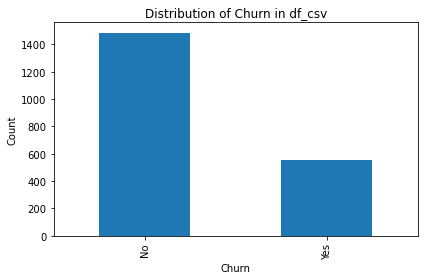

In [747]:
# Assess the data distribution for categorical columns

# Value counts for categorical columns in df_db
print("df_db")
df_db_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_db_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_db[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_db
df_db['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_db')
plt.tight_layout()
plt.show()

# Value counts for categorical columns in df_csv
print("df_csv")
df_csv_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_csv_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_csv[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_csv
df_csv['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_csv')
plt.tight_layout()
plt.show()

In [748]:
# Impute missing values in numerical columns using median
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_db[numerical_cols] = df_db[numerical_cols].fillna(df_db[numerical_cols].median())
df_csv[numerical_cols] = df_csv[numerical_cols].fillna(df_csv[numerical_cols].median())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].median())

# Impute missing values in categorical columns using mode
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_db[categorical_cols] = df_db[categorical_cols].fillna(df_db[categorical_cols].mode().iloc[0])
df_csv[categorical_cols] = df_csv[categorical_cols].fillna(df_csv[categorical_cols].mode().iloc[0])
df_test[categorical_cols] = df_test[categorical_cols].fillna(df_test[categorical_cols].mode().iloc[0])

# Drop row with missing value in Churn column in df_db
df_db = df_db.dropna(subset=['Churn'])

# Check if any missing values remain
print("Remaining Missing Values in df_db:")
print(df_db.isnull().sum())
print()

print("Remaining Missing Values in df_csv:")
print(df_csv.isnull().sum())
print()

print("Remaining Missing Values in df_test:")
print(df_test.isnull().sum())
print()


Remaining Missing Values in df_db:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remaining Missing Values in df_csv:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn        

### Encoding

In [749]:
# Ensure uniqueness of datasets
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for df_db
label_encoder_db = LabelEncoder()
df_db['gender'] = label_encoder_db.fit_transform(df_db['gender'])
df_db['SeniorCitizen'] = label_encoder_db.fit_transform(df_db['SeniorCitizen'])
df_db['Partner'] = label_encoder_db.fit_transform(df_db['Partner'])
df_db['Dependents'] = label_encoder_db.fit_transform(df_db['Dependents'])
df_db['PhoneService'] = label_encoder_db.fit_transform(df_db['PhoneService'])
df_db['MultipleLines'] = label_encoder_db.fit_transform(df_db['MultipleLines'])
df_db['InternetService'] = label_encoder_db.fit_transform(df_db['InternetService'])
df_db['OnlineSecurity'] = label_encoder_db.fit_transform(df_db['OnlineSecurity'])
df_db['OnlineBackup'] = label_encoder_db.fit_transform(df_db['OnlineBackup'])
df_db['DeviceProtection'] = label_encoder_db.fit_transform(df_db['DeviceProtection'])
df_db['TechSupport'] = label_encoder_db.fit_transform(df_db['TechSupport'])
df_db['StreamingTV'] = label_encoder_db.fit_transform(df_db['StreamingTV'])
df_db['StreamingMovies'] = label_encoder_db.fit_transform(df_db['StreamingMovies'])
df_db['Contract'] = label_encoder_db.fit_transform(df_db['Contract'])
df_db['PaperlessBilling'] = label_encoder_db.fit_transform(df_db['PaperlessBilling'])
df_db['PaymentMethod'] = label_encoder_db.fit_transform(df_db['PaymentMethod'])
df_db['Churn'] = label_encoder_db.fit_transform(df_db['Churn'])

# Perform label encoding for df_csv
label_encoder_csv = LabelEncoder()
df_csv['gender'] = label_encoder_csv.fit_transform(df_csv['gender'])
df_csv['SeniorCitizen'] = label_encoder_csv.fit_transform(df_csv['SeniorCitizen'])
df_csv['Partner'] = label_encoder_csv.fit_transform(df_csv['Partner'])
df_csv['Dependents'] = label_encoder_csv.fit_transform(df_csv['Dependents'])
df_csv['PhoneService'] = label_encoder_csv.fit_transform(df_csv['PhoneService'])
df_csv['MultipleLines'] = label_encoder_csv.fit_transform(df_csv['MultipleLines'])
df_csv['InternetService'] = label_encoder_csv.fit_transform(df_csv['InternetService'])
df_csv['OnlineSecurity'] = label_encoder_csv.fit_transform(df_csv['OnlineSecurity'])
df_csv['OnlineBackup'] = label_encoder_csv.fit_transform(df_csv['OnlineBackup'])
df_csv['DeviceProtection'] = label_encoder_csv.fit_transform(df_csv['DeviceProtection'])
df_csv['TechSupport'] = label_encoder_csv.fit_transform(df_csv['TechSupport'])
df_csv['StreamingTV'] = label_encoder_csv.fit_transform(df_csv['StreamingTV'])
df_csv['StreamingMovies'] = label_encoder_csv.fit_transform(df_csv['StreamingMovies'])
df_csv['Contract'] = label_encoder_csv.fit_transform(df_csv['Contract'])
df_csv['PaperlessBilling'] = label_encoder_csv.fit_transform(df_csv['PaperlessBilling'])
df_csv['PaymentMethod'] = label_encoder_csv.fit_transform(df_csv['PaymentMethod'])
df_csv['Churn'] = label_encoder_csv.fit_transform(df_csv['Churn'])

# Perform label encoding for df_test
label_encoder_test = LabelEncoder()
df_test['gender'] = label_encoder_test.fit_transform(df_test['gender'])
df_test['SeniorCitizen'] = label_encoder_test.fit_transform(df_test['SeniorCitizen'])
df_test['Partner'] = label_encoder_test.fit_transform(df_test['Partner'])
df_test['Dependents'] = label_encoder_test.fit_transform(df_test['Dependents'])
df_test['PhoneService'] = label_encoder_test.fit_transform(df_test['PhoneService'])
df_test['MultipleLines'] = label_encoder_test.fit_transform(df_test['MultipleLines'])
df_test['InternetService'] = label_encoder_test.fit_transform(df_test['InternetService'])
df_test['OnlineSecurity'] = label_encoder_test.fit_transform(df_test['OnlineSecurity'])
df_test['OnlineBackup'] = label_encoder_test.fit_transform(df_test['OnlineBackup'])
df_test['DeviceProtection'] = label_encoder_test.fit_transform(df_test['DeviceProtection'])
df_test['TechSupport'] = label_encoder_test.fit_transform(df_test['TechSupport'])
df_test['StreamingTV'] = label_encoder_test.fit_transform(df_test['StreamingTV'])
df_test['StreamingMovies'] = label_encoder_test.fit_transform(df_test['StreamingMovies'])
df_test['Contract'] = label_encoder_test.fit_transform(df_test['Contract'])
df_test['PaperlessBilling'] = label_encoder_test.fit_transform(df_test['PaperlessBilling'])
df_test['PaymentMethod'] = label_encoder_test.fit_transform(df_test['PaymentMethod'])

# Verify the encoded datasets
print("df_db Encoded:")
print(df_db.head())
print()

print("df_csv Encoded:")
print(df_csv.head())
print()

print("df_test Encoded:")
print(df_test.head())
print()


df_db Encoded:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                0               0  ...   
1             1              0                0               1  ...   
2             1              0                0               1  ...   
3             0              0                0               1  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                

# Data Evaluation

Perform bivariate, multivariate analyses as well as hypothesis testing to answer the hypothesis and questions

Create visualizations to explore relationships, collinearity, churn rate, distributions, and other relevant factors.

Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, 
    and payment methods.
    
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

### df_db Evaluation

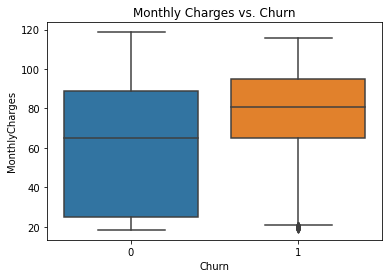

Contingency Table 1:
MonthlyCharges  (18.398999999999997, 25.1]  (25.1, 59.91]  (59.91, 79.85]  \
Churn                                                                       
0                                      559            458             419   
1                                       45            138             183   

MonthlyCharges  (79.85, 94.52]  (94.52, 118.65]  
Churn                                            
0                          385              398  
1                          212              202  

Question 1 - Monthly Charges and Churn:
Chi-square statistic: 162.94482281633853
P-value: 3.4142081220642385e-34
There is a significant relationship between monthly charges and churn.


In [750]:
# Question 1: Is there a relationship between the monthly charges and the likelihood of churn?

# Bivariate analysis using box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_db)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Hypothesis testing

# Step 1: Create a contingency table
contingency_table_1 = pd.crosstab(df_db['Churn'], pd.qcut(df_db['MonthlyCharges'], q=5))
print("Contingency Table 1:")
print(contingency_table_1)

# Step 2: Perform chi-square test
chi2_1, p_value_1, _, _ = chi2_contingency(contingency_table_1)

# Step 3: Interpret the results
alpha = 0.05  # Set the significance level
print("\nQuestion 1 - Monthly Charges and Churn:")
print(f"Chi-square statistic: {chi2_1}")
print(f"P-value: {p_value_1}")
if p_value_1 < alpha:
    print("There is a significant relationship between monthly charges and churn.")
else:
    print("There is no significant relationship between monthly charges and churn.")

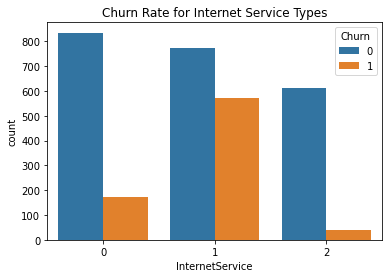


Contingency Table 2:
InternetService    0    1    2
Churn                         
0                835  772  612
1                171  570   39

Question 2 - Internet Service and Churn:
Chi-square statistic: 367.0553681516438
P-value: 1.9721481175943434e-80
There is a significant relationship between internet service and churn.


In [751]:
# Question 2:
# Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

# Bivariate analysis using bar plot
sns.countplot(x='InternetService', hue='Churn', data=df_db)
plt.title("Churn Rate for Internet Service Types")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_2 = pd.crosstab(df_db['Churn'], df_db['InternetService'])
print("\nContingency Table 2:")
print(contingency_table_2)

# Step 2: Perform chi-square test
chi2_2, p_value_2, _, _ = chi2_contingency(contingency_table_2)

# Step 3: Interpret the results
print("\nQuestion 2 - Internet Service and Churn:")
print(f"Chi-square statistic: {chi2_2}")
print(f"P-value: {p_value_2}")
if p_value_2 < alpha:
    print("There is a significant relationship between internet service and churn.")
else:
    print("There is no significant relationship between internet service and churn.")

Online Security


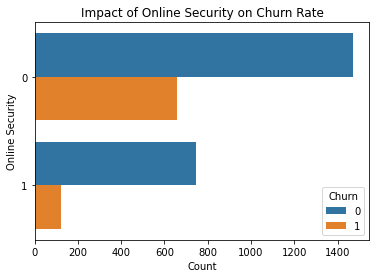

Chi-square test results for Online Security:
Chi-square statistic: 87.15020815144065
P-value: 1.005844331387647e-20
There is a significant relationship between online security and churn.
Online Backup


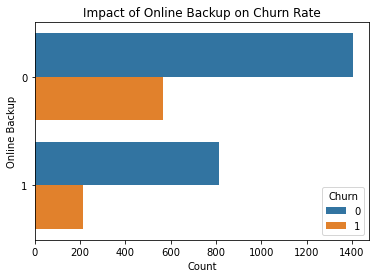

Chi-square test results for Online Backup:
Chi-square statistic: 20.692623894650108
P-value: 5.39233230936915e-06
There is a significant relationship between online backup and churn.
Device Protection


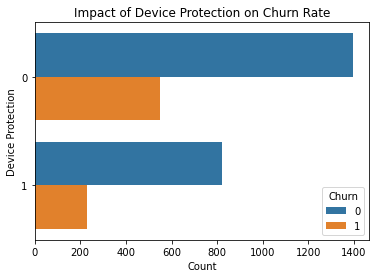

Chi-square test results for Device Protection:
Chi-square statistic: 14.140869014924231
P-value: 0.00016961835951075113
There is a significant relationship between device protection and churn.
Tech Support


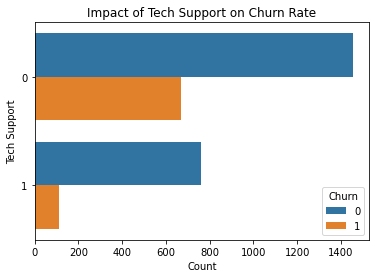

Chi-square test results for Tech Support:
Chi-square statistic: 112.11987964235124
P-value: 3.363454366915101e-26
There is a significant relationship between tech support and churn.


In [752]:
# Question 3: Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

# Online Security

print ("Online Security")
# Generate the count plot
df_online_security = df_db[['OnlineSecurity', 'Churn']]
df_online_security = df_online_security.replace({True: 'Yes', False: 'No'})
df_online_security = df_online_security.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='OnlineSecurity', hue='Churn', data=df_online_security, orient='h')
plt.title("Impact of Online Security on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Online Security")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_db['OnlineSecurity'], df_db['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Security:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online security and churn.")
else:
    print("There is no significant relationship between online security and churn.")
    
    
# Online backup

print ("Online Backup")
# Generate the count plot
df_online_backup = df_db[['OnlineBackup', 'Churn']]
df_online_backup = df_online_backup.replace({True: 'Yes', False: 'No'})
df_online_backup = df_online_backup.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='OnlineBackup', hue='Churn', data=df_online_backup, orient='h')
plt.title("Impact of Online Backup on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Online Backup")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_db['OnlineBackup'], df_db['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Backup:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online backup and churn.")
else:
    print("There is no significant relationship between online backup and churn.")
    

# Device Protection

print ("Device Protection")
## Generate the count plot
df_device_protection = df_db[['DeviceProtection', 'Churn']]
df_device_protection = df_device_protection.replace({True: 'Yes', False: 'No'})
df_device_protection = df_device_protection.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='DeviceProtection', hue='Churn', data=df_device_protection, orient='h')
plt.title("Impact of Device Protection on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Device Protection")
plt.show()

## Perform chi-square test for independence
contingency_table = pd.crosstab(df_db['DeviceProtection'], df_db['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Device Protection:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


if p_value < alpha:
    print("There is a significant relationship between device protection and churn.")
else:
    print("There is no significant relationship between device protection and churn.")

# Tech Support

print ("Tech Support")
# Generate the count plot
df_tech_support = df_db[['TechSupport', 'Churn']]
df_tech_support = df_tech_support.replace({True: 'Yes', False: 'No'})
df_tech_support = df_tech_support.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='TechSupport', hue='Churn', data=df_tech_support, orient='h')
plt.title("Impact of Tech Support on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Tech Support")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_db['TechSupport'], df_db['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Tech Support:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between tech support and churn.")
else:
    print("There is no significant relationship between tech support and churn.")

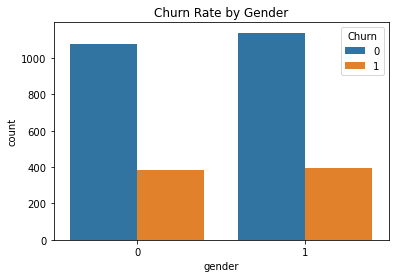


Contingency Table 4:
gender     0     1
Churn             
0       1079  1140
1        384   396

Question 4 - Gender and Churn:
Chi-square statistic: 0.06213024832996494
P-value: 0.8031601346661686
There is no significant relationship between gender and churn.


In [753]:
# Question 4: How does the churn rate vary based on the customers' gender?
# Bivariate analysis using bar plot
sns.countplot(x='gender', hue='Churn', data=df_db)
plt.title("Churn Rate by Gender")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_4 = pd.crosstab(df_db['Churn'], df_db['gender'])
print("\nContingency Table 4:")
print(contingency_table_4)

# Step 2: Perform chi-square test
chi2_4, p_value_4, _, _ = chi2_contingency(contingency_table_4)

# Step 3: Interpret the results
print("\nQuestion 4 - Gender and Churn:")
print(f"Chi-square statistic: {chi2_4}")
print(f"P-value: {p_value_4}")
if p_value_4 < alpha:
    print("There is a significant relationship between gender and churn.")
else:
    print("There is no significant relationship between gender and churn.")

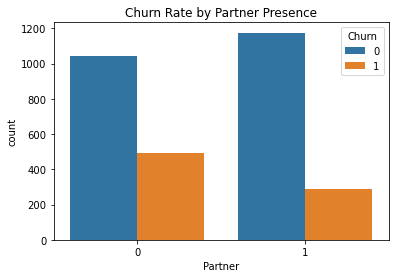


Contingency Table 5:
Partner     0     1
Churn              
0        1044  1175
1         494   286

Question 5 - Partner and Churn:
Chi-square statistic: 60.61362385892011
P-value: 6.945167513029977e-15
There is a significant relationship between partner and churn.


In [754]:
# Question 5: Does the presence of a partner influence the likelihood of churn?
# Bivariate analysis using bar plot
sns.countplot(x='Partner', hue='Churn', data=df_db)
plt.title("Churn Rate by Partner Presence")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_5 = pd.crosstab(df_db['Churn'], df_db['Partner'])
print("\nContingency Table 5:")
print(contingency_table_5)

# Step 2: Perform chi-square test
chi2_5, p_value_5, _, _ = chi2_contingency(contingency_table_5)

# Step 3: Interpret the results
print("\nQuestion 5 - Partner and Churn:")
print(f"Chi-square statistic: {chi2_5}")
print(f"P-value: {p_value_5}")
if p_value_5 < alpha:
    print("There is a significant relationship between partner and churn.")
else:
    print("There is no significant relationship between partner and churn.")

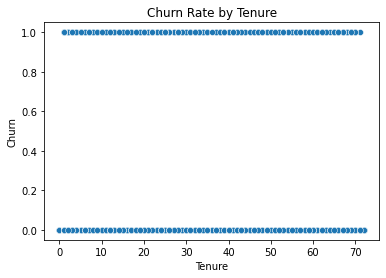


Contingency Table 6:
tenure  (0, 12]  (12, 24]  (24, 36]  (36, 48]  (48, 60]  (60, 72]
Churn                                                            
0           499       297       288       268       287       575
1           427       133        76        53        53        38

Question 6 - Tenure and Churn:
Chi-square statistic: 363.6996120231594
P-value: 1.96400745706313e-76
There is a significant relationship between tenure and churn.


In [755]:
# Question 6: Is there a correlation between the tenure of customers and their churn rate?

# Bivariate analysis using scatter plot
sns.scatterplot(x='tenure', y='Churn', data=df_db)
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_6 = pd.crosstab(df_db['Churn'], pd.cut(df_db['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]))
print("\nContingency Table 6:")
print(contingency_table_6)

# Step 2: Perform chi-square test
chi2_6, p_value_6, _, _ = chi2_contingency(contingency_table_6)

# Step 3: Interpret the results
print("\nQuestion 6 - Tenure and Churn:")
print(f"Chi-square statistic: {chi2_6}")
print(f"P-value: {p_value_6}")
if p_value_6 < alpha:
    print("There is a significant relationship between tenure and churn.")
else:
    print("There is no significant relationship between tenure and churn.")

### df_csv Evaluation

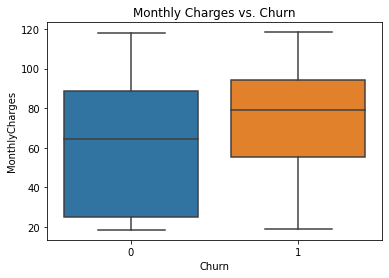

Contingency Table 1:
MonthlyCharges  (18.549, 25.15]  (25.15, 56.89]  (56.89, 78.91]  \
Churn                                                             
0                           374             294             287   
1                            40             109             122   

MonthlyCharges  (78.91, 94.1]  (94.1, 118.35]  
Churn                                          
0                         261             271  
1                         148             137  

Question 1 - Monthly Charges and Churn:
Chi-square statistic: 90.76991190755558
P-value: 9.035271691871585e-19
There is a significant relationship between monthly charges and churn.


In [756]:
# Question 1: Is there a relationship between the monthly charges and the likelihood of churn?

# Bivariate analysis using box plot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_csv)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Hypothesis testing

# Step 1: Create a contingency table
contingency_table_1 = pd.crosstab(df_csv['Churn'], pd.qcut(df_csv['MonthlyCharges'], q=5))
print("Contingency Table 1:")
print(contingency_table_1)

# Step 2: Perform chi-square test
chi2_1, p_value_1, _, _ = chi2_contingency(contingency_table_1)

# Step 3: Interpret the results
alpha = 0.05  # Set the significance level
print("\nQuestion 1 - Monthly Charges and Churn:")
print(f"Chi-square statistic: {chi2_1}")
print(f"P-value: {p_value_1}")
if p_value_1 < alpha:
    print("There is a significant relationship between monthly charges and churn.")
else:
    print("There is no significant relationship between monthly charges and churn.")

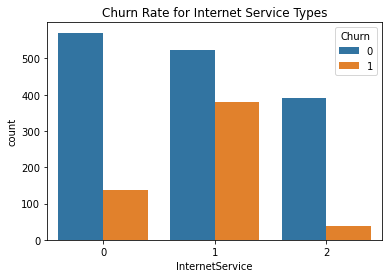


Contingency Table 2:
InternetService    0    1    2
Churn                         
0                571  524  392
1                138  381   37

Question 2 - Internet Service and Churn:
Chi-square statistic: 197.57125302144135
P-value: 1.2529897406150327e-43
There is a significant relationship between internet service and churn.


In [757]:
# Question 2:
# Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

# Bivariate analysis using bar plot
sns.countplot(x='InternetService', hue='Churn', data=df_csv)
plt.title("Churn Rate for Internet Service Types")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_2 = pd.crosstab(df_csv['Churn'], df_csv['InternetService'])
print("\nContingency Table 2:")
print(contingency_table_2)

# Step 2: Perform chi-square test
chi2_2, p_value_2, _, _ = chi2_contingency(contingency_table_2)

# Step 3: Interpret the results
print("\nQuestion 2 - Internet Service and Churn:")
print(f"Chi-square statistic: {chi2_2}")
print(f"P-value: {p_value_2}")
if p_value_2 < alpha:
    print("There is a significant relationship between internet service and churn.")
else:
    print("There is no significant relationship between internet service and churn.")

Online Security


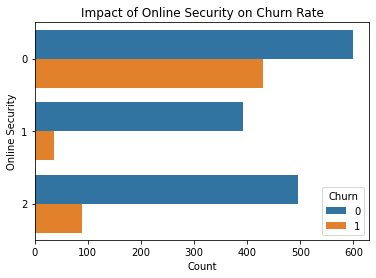

Chi-square test results for Online Security:
Chi-square statistic: 225.04002461275684
P-value: 1.3588751342402623e-49
There is a significant relationship between online security and churn.
Online Backup


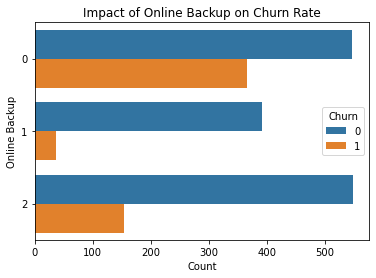

Chi-square test results for Online Backup:
Chi-square statistic: 160.80173526893822
P-value: 1.2087788320980987e-35
There is a significant relationship between online backup and churn.
Device Protection


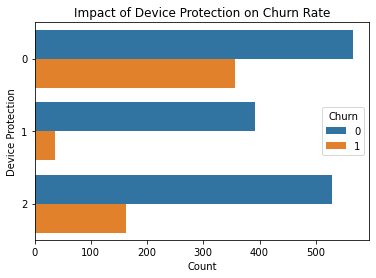

Chi-square test results for Device Protection:
Chi-square statistic: 139.51293704411387
P-value: 5.071665987457244e-31
There is a significant relationship between device protection and churn.
Tech Support


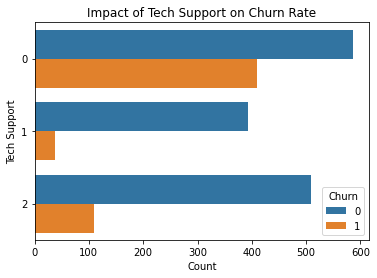

Chi-square test results for Tech Support:
Chi-square statistic: 198.94863717322025
P-value: 6.292921970953173e-44
There is a significant relationship between tech support and churn.


In [758]:
# Question 3: Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

# Online Security

print ("Online Security")
# Generate the count plot
df_online_security = df_csv[['OnlineSecurity', 'Churn']]
df_online_security = df_online_security.replace({True: 'Yes', False: 'No'})
df_online_security = df_online_security.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='OnlineSecurity', hue='Churn', data=df_online_security, orient='h')
plt.title("Impact of Online Security on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Online Security")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_csv['OnlineSecurity'], df_csv['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Security:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online security and churn.")
else:
    print("There is no significant relationship between online security and churn.")
    
    
# Online backup

print ("Online Backup")
# Generate the count plot
df_online_backup = df_csv[['OnlineBackup', 'Churn']]
df_online_backup = df_online_backup.replace({True: 'Yes', False: 'No'})
df_online_backup = df_online_backup.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='OnlineBackup', hue='Churn', data=df_online_backup, orient='h')
plt.title("Impact of Online Backup on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Online Backup")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_csv['OnlineBackup'], df_csv['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Online Backup:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between online backup and churn.")
else:
    print("There is no significant relationship between online backup and churn.")
    

# Device Protection

print ("Device Protection")
## Generate the count plot
df_device_protection = df_csv[['DeviceProtection', 'Churn']]
df_device_protection = df_device_protection.replace({True: 'Yes', False: 'No'})
df_device_protection = df_device_protection.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='DeviceProtection', hue='Churn', data=df_device_protection, orient='h')
plt.title("Impact of Device Protection on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Device Protection")
plt.show()

## Perform chi-square test for independence
contingency_table = pd.crosstab(df_csv['DeviceProtection'], df_csv['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Device Protection:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between device protection and churn.")
else:
    print("There is no significant relationship between device protection and churn.")

# Tech Support

print ("Tech Support")
# Generate the count plot
df_tech_support = df_csv[['TechSupport', 'Churn']]
df_tech_support = df_tech_support.replace({True: 'Yes', False: 'No'})
df_tech_support = df_tech_support.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')

sns.barplot(x='Count', y='TechSupport', hue='Churn', data=df_tech_support, orient='h')
plt.title("Impact of Tech Support on Churn Rate")
plt.xlabel("Count")
plt.ylabel("Tech Support")
plt.show()

# Perform chi-square test for independence
contingency_table = pd.crosstab(df_csv['TechSupport'], df_csv['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results for Tech Support:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("There is a significant relationship between tech support and churn.")
else:
    print("There is no significant relationship between tech support and churn.")


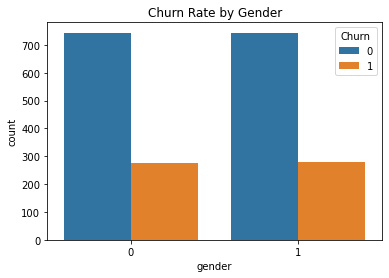


Contingency Table 4:
gender    0    1
Churn           
0       744  743
1       277  279

Question 4 - Gender and Churn:
Chi-square statistic: 0.0013090852043174833
P-value: 0.9711378106073397
There is no significant relationship between gender and churn.


In [759]:
# Question 4: How does the churn rate vary based on the customers' gender?
# Bivariate analysis using bar plot
sns.countplot(x='gender', hue='Churn', data=df_csv)
plt.title("Churn Rate by Gender")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_4 = pd.crosstab(df_csv['Churn'], df_csv['gender'])
print("\nContingency Table 4:")
print(contingency_table_4)

# Step 2: Perform chi-square test
chi2_4, p_value_4, _, _ = chi2_contingency(contingency_table_4)

# Step 3: Interpret the results
print("\nQuestion 4 - Gender and Churn:")
print(f"Chi-square statistic: {chi2_4}")
print(f"P-value: {p_value_4}")
if p_value_4 < alpha:
    print("There is a significant relationship between gender and churn.")
else:
    print("There is no significant relationship between gender and churn.")

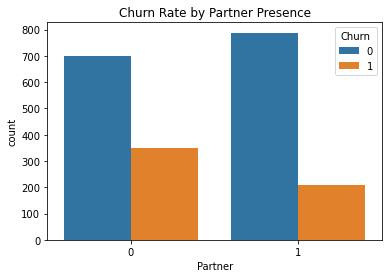


Contingency Table 5:
Partner    0    1
Churn            
0        699  788
1        348  208

Question 5 - Partner and Churn:
Chi-square statistic: 38.70879518596099
P-value: 4.919871683624267e-10
There is a significant relationship between partner and churn.


In [760]:
# Question 5: Does the presence of a partner influence the likelihood of churn?
# Bivariate analysis using bar plot
sns.countplot(x='Partner', hue='Churn', data=df_csv)
plt.title("Churn Rate by Partner Presence")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_5 = pd.crosstab(df_csv['Churn'], df_csv['Partner'])
print("\nContingency Table 5:")
print(contingency_table_5)

# Step 2: Perform chi-square test
chi2_5, p_value_5, _, _ = chi2_contingency(contingency_table_5)

# Step 3: Interpret the results
print("\nQuestion 5 - Partner and Churn:")
print(f"Chi-square statistic: {chi2_5}")
print(f"P-value: {p_value_5}")
if p_value_5 < alpha:
    print("There is a significant relationship between partner and churn.")
else:
    print("There is no significant relationship between partner and churn.")

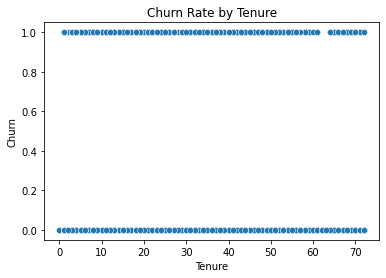


Contingency Table 6:
tenure  (0, 12]  (12, 24]  (24, 36]  (36, 48]  (48, 60]  (60, 72]
Churn                                                            
0           302       220       191       183       216       372
1           306        82        48        55        34        31

Question 6 - Tenure and Churn:
Chi-square statistic: 272.83083047032625
P-value: 6.901818000341402e-57
There is a significant relationship between tenure and churn.


In [761]:
# Question 6: Is there a correlation between the tenure of customers and their churn rate?

# Bivariate analysis using scatter plot
sns.scatterplot(x='tenure', y='Churn', data=df_csv)
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.show()

# Hypothesis testing
# Step 1: Create a contingency table
contingency_table_6 = pd.crosstab(df_csv['Churn'], pd.cut(df_csv['tenure'], bins=[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]))
print("\nContingency Table 6:")
print(contingency_table_6)

# Step 2: Perform chi-square test
chi2_6, p_value_6, _, _ = chi2_contingency(contingency_table_6)

# Step 3: Interpret the results
print("\nQuestion 6 - Tenure and Churn:")
print(f"Chi-square statistic: {chi2_6}")
print(f"P-value: {p_value_6}")
if p_value_6 < alpha:
    print("There is a significant relationship between tenure and churn.")
else:
    print("There is no significant relationship between tenure and churn.")

# Modelling

In [762]:
# Combine df_db and df_csv into df_CustomerChurn
df_CustomerChurn = pd.concat([df_db, df_csv], ignore_index=True)

# Print the shape of df_CustomerChurn to verify the combination
print("Shape of df_CustomerChurn:", df_CustomerChurn.shape)

Shape of df_CustomerChurn: (5042, 21)


In [763]:
# Drop the customerID column
df_CustomerChurn = df_CustomerChurn.drop('customerID', axis=1)

In [764]:
# Split the data into features (X) and the target variable (y)
X = df_CustomerChurn.drop('Churn', axis=1)
y = df_CustomerChurn['Churn']

In [765]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [766]:
# Train and evaluate multiple models using Logistic Regression, Random Forest, Support Vector Machine (SVM), and Gradient Boosting.
# Initialize the models
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()
gb = GradientBoostingClassifier()

# Train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)
svm_preds = svm.predict(X_test)
gb_preds = gb.predict(X_test)

# Evaluate the models
accuracy = [accuracy_score(y_test, preds) for preds in [logreg_preds, rf_preds, svm_preds, gb_preds]]
precision = [precision_score(y_test, preds) for preds in [logreg_preds, rf_preds, svm_preds, gb_preds]]
recall = [recall_score(y_test, preds) for preds in [logreg_preds, rf_preds, svm_preds, gb_preds]]
f1 = [f1_score(y_test, preds) for preds in [logreg_preds, rf_preds, svm_preds, gb_preds]]
f2 = [fbeta_score(y_test, preds, beta=2) for preds in [logreg_preds, rf_preds, svm_preds, gb_preds]]

# Create a dataframe to compare the model performance
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting'],
                                 'Accuracy': accuracy,
                                 'Precision': precision,
                                 'Recall': recall,
                                 'F1 Score': f1,
                                 'F2 Score': f2})

print(model_comparison)


                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression  0.809713   0.616000   0.616  0.616000  0.616000
1        Random Forest  0.812686   0.639269   0.560  0.597015  0.574241
2                  SVM  0.752230   0.000000   0.000  0.000000  0.000000
3    Gradient Boosting  0.813677   0.634783   0.584  0.608333  0.593496


## Evaluation of chosen model(s)

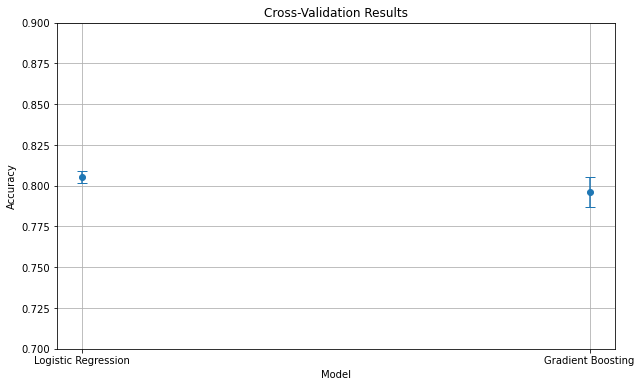

In [767]:
# Define the models
logistic_regression = LogisticRegression()
gradient_boosting = GradientBoostingClassifier()

# Chosen Models: Logistic Regression and Gradient Boosting
models = ['Logistic Regression', 'Gradient Boosting']
classifiers = [logistic_regression, gradient_boosting]

# Evaluate models using k-Fold Cross-Validation
cv_results = []
for model in classifiers:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results.append(scores)

# Calculate mean and standard deviation of cross-validation results
mean_scores = [np.mean(scores) for scores in cv_results]
std_scores = [np.std(scores) for scores in cv_results]

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.errorbar(models, mean_scores, yerr=std_scores, fmt='o', capsize=5)
plt.title('Cross-Validation Results')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.grid(True)
plt.show()



## Model Improvement by hyperparameter tuning

In [768]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0]
}

# Create the logistic regression model
logistic_regression = LogisticRegression()

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}
Best Score:  0.7971782264982888


# Future Predictions

Predict on the test set 

Visualize the results using a Confusion Matrix.

Provide a detailed explanation of the Confusion Matrix visual.

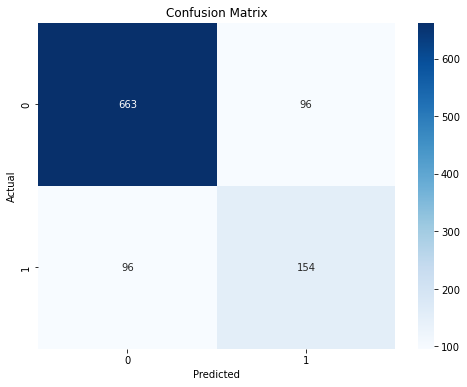

Test Set Evaluation Metrics:
Accuracy: 0.8097
Precision: 0.6160
Recall: 0.6160
F1 Score: 0.6160


In [770]:
# Fit the logistic regression model with the training data
logistic_regression.fit(X_train, y_train)

# Predict on the test set using the fitted logistic regression model
y_pred_test = logistic_regression.predict(X_test)

# Predict on the test set using the fitted logistic regression model
y_pred_test = logistic_regression.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Test Set Evaluation Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
